<a href="https://colab.research.google.com/github/Thennarasu00/Sample-code-/blob/main/Copy_of_Smart_Home_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
taranvee_smart_home_dataset_with_weather_information_path = kagglehub.dataset_download('taranvee/smart-home-dataset-with-weather-information')

print('Data source import complete.')

Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-home-dataset-with-weather-information/HomeC.csv


# Data Exploration

### Data reading

In [ ]:
df = pd.read_csv(os.path.join(dirname, filename), low_memory=False)
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
df.columns

Index(['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office',
       'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14',
       'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'kitchen', 'Furnace'],
      dtype='object')

### Data Preprocessing

In [ ]:
# Rename columns to remove spaces and the kW unit
df.columns = [col[:-5].replace(' ','_') if 'kW' in col else col for col in df.columns]

# Drop rows with nan values
df = df.dropna()

# The columns "use" and "house_overall" are the same, so let's remove the 'house_overall' column
df.drop(['House_overall'], axis=1, inplace=True)

# The columns "gen" and "solar" are the same, so let's remove the 'solar' column
df.drop(['Solar'], axis=1, inplace=True)

# drop rows with cloudCover column values that are not numeric (bug in sensors) and convert column to numeric
df = df[df['cloudCover']!='cloudCover']
df["cloudCover"] = pd.to_numeric(df["cloudCover"])

# Create columns that regroup kitchens and furnaces
df['kitchen'] = df['Kitchen_12'] + df['Kitchen_14'] + df['Kitchen_38']
df['Furnace'] = df['Furnace_1'] + df['Furnace_2']

# Convert "time" column (which is a unix timestamp) to a Y-m-d H-M-S
import time
start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))
time_index = pd.date_range(start_time, periods=len(df), freq='min')
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

<ipython-input-28-26e61e63e31f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['House_overall'], axis=1, inplace=True)
<ipython-input-28-26e61e63e31f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Solar'], axis=1, inplace=True)
<ipython-input-28-26e61e63e31f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cloudCover"] = pd.to_numeric(df["cloudCover

### Data Analysis

In [ ]:
df.shape

(503852, 31)

In [ ]:
df.columns

Index(['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office',
       'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14',
       'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'kitchen', 'Furnace'],
      dtype='object')

In [ ]:
# lower frist letter of a string
func = lambda s: s[:1].lower() + s[1:] if s else ''

In [ ]:
cols = list(df.dtypes.keys())
categ_cols = [col for col in cols if df[col].dtype=='O']
num_cols = [col for col in cols if col not in categ_cols]
print('categ_cols : ', categ_cols)
print('num_cols : ', num_cols)

categ_cols :  ['icon', 'summary']
num_cols :  ['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office', 'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14', 'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'kitchen', 'Furnace']


In [ ]:
# Let's remove rows with values that appear less than a certain percentage %

def remove_less_percent(col, percent):
    keys_to_conserve = [key for key,value in df[col].value_counts(normalize=True).items() if value>=percent]
    return df[df[col].isin(keys_to_conserve)]

print(len(df))
df = remove_less_percent('summary', 0.05)
print(len(df))
df = remove_less_percent('icon', 0.05)
print(len(df))

503852
466308
466308


In [ ]:
# plot bars of unique values of categorical columns

def plot_bars(col):

    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure

    figure(figsize=(14, 8), dpi=80)
    plt.xticks(rotation = 90)

    D = df[col].value_counts(normalize=True).to_dict()

    plt.bar(*zip(*D.items()))
    plt.show()

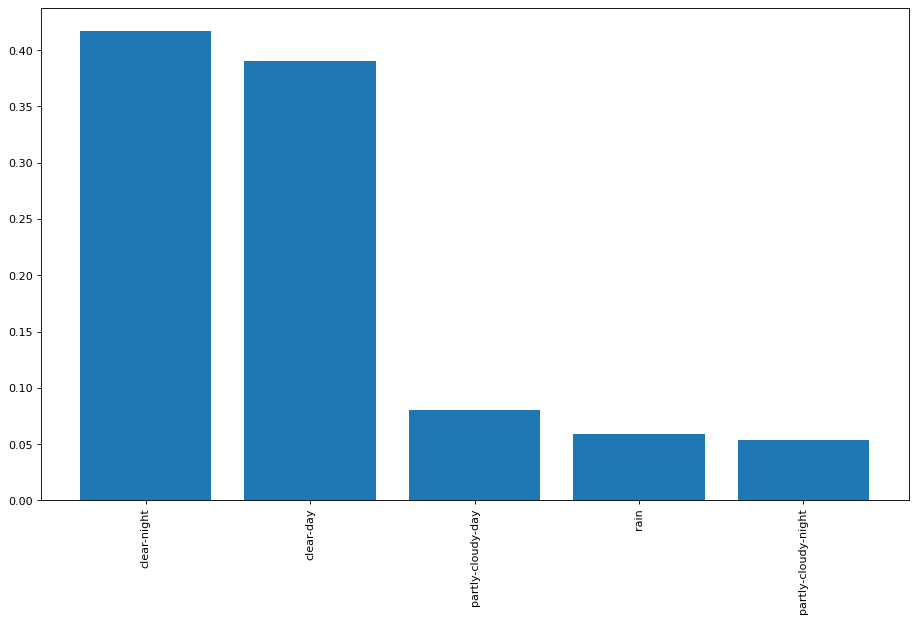

In [ ]:
plot_bars('icon')

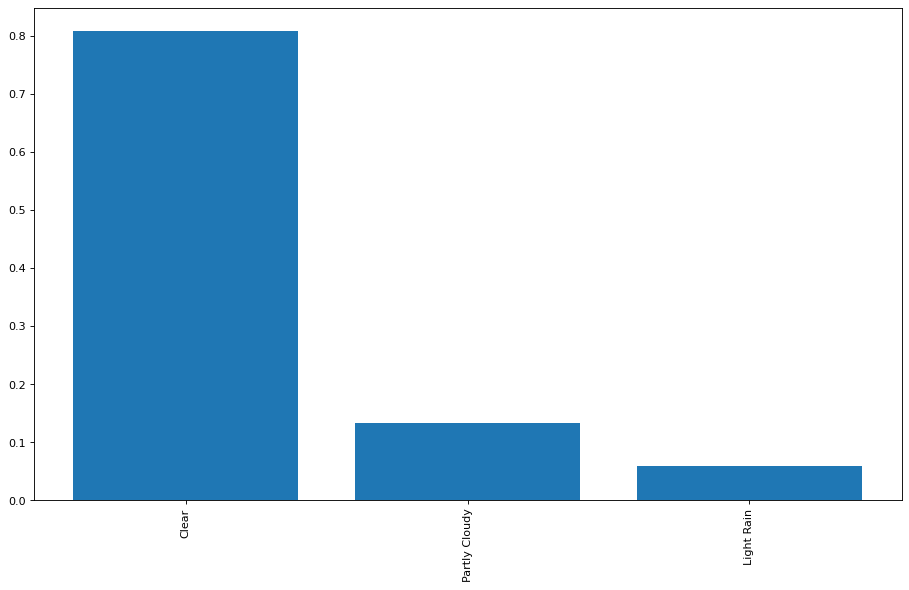

In [ ]:
plot_bars('summary')

<Axes: >

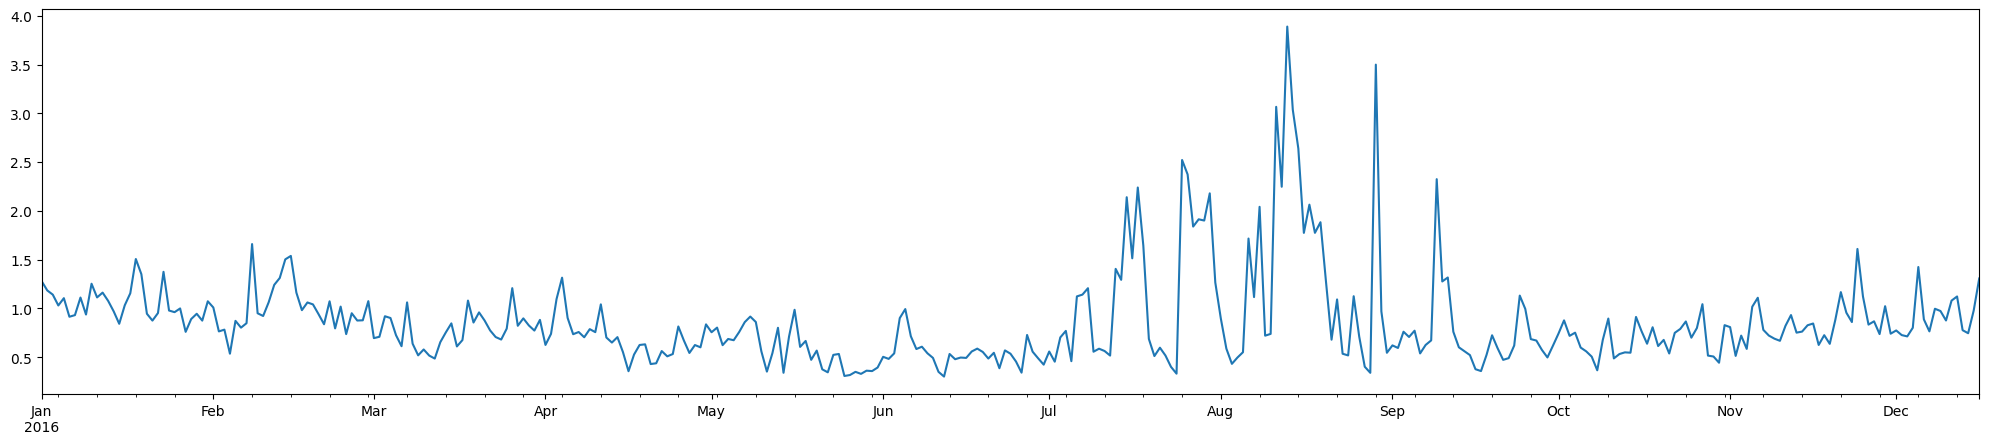

In [ ]:
df['use'].resample(rule='D').mean().plot(figsize=(25,5))

<Axes: >

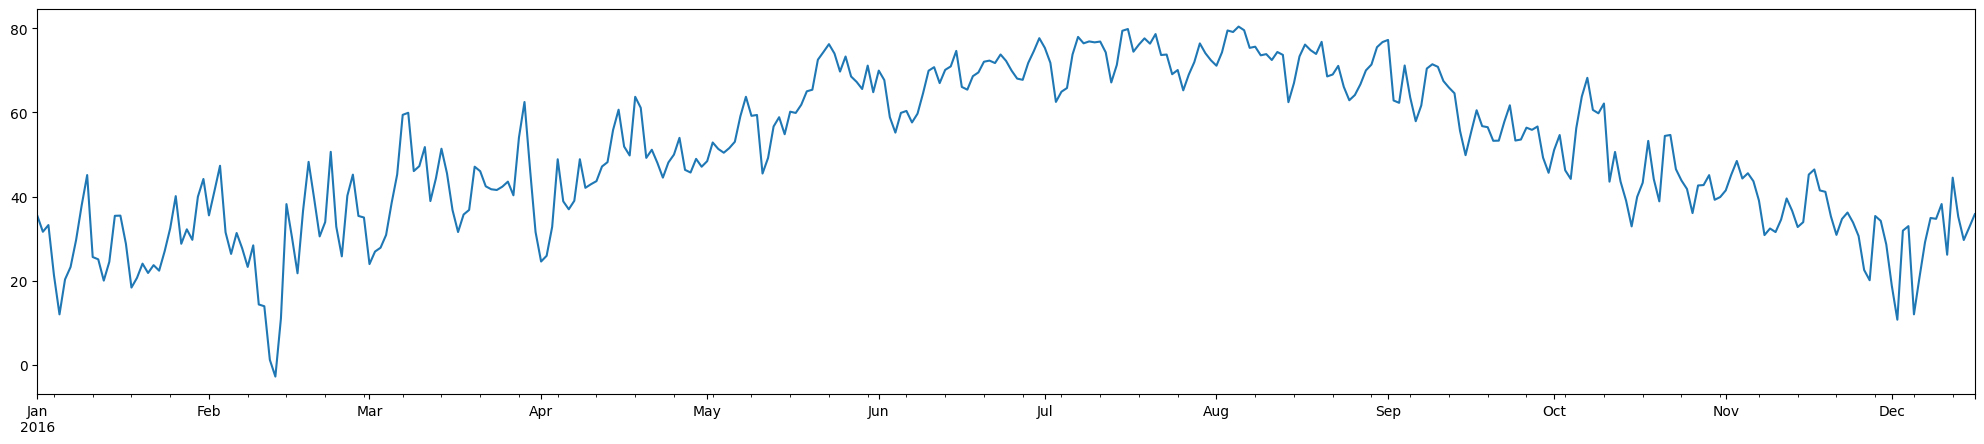

In [ ]:
df['temperature'].resample(rule='D').mean().plot(figsize=(25,5))

<Axes: >

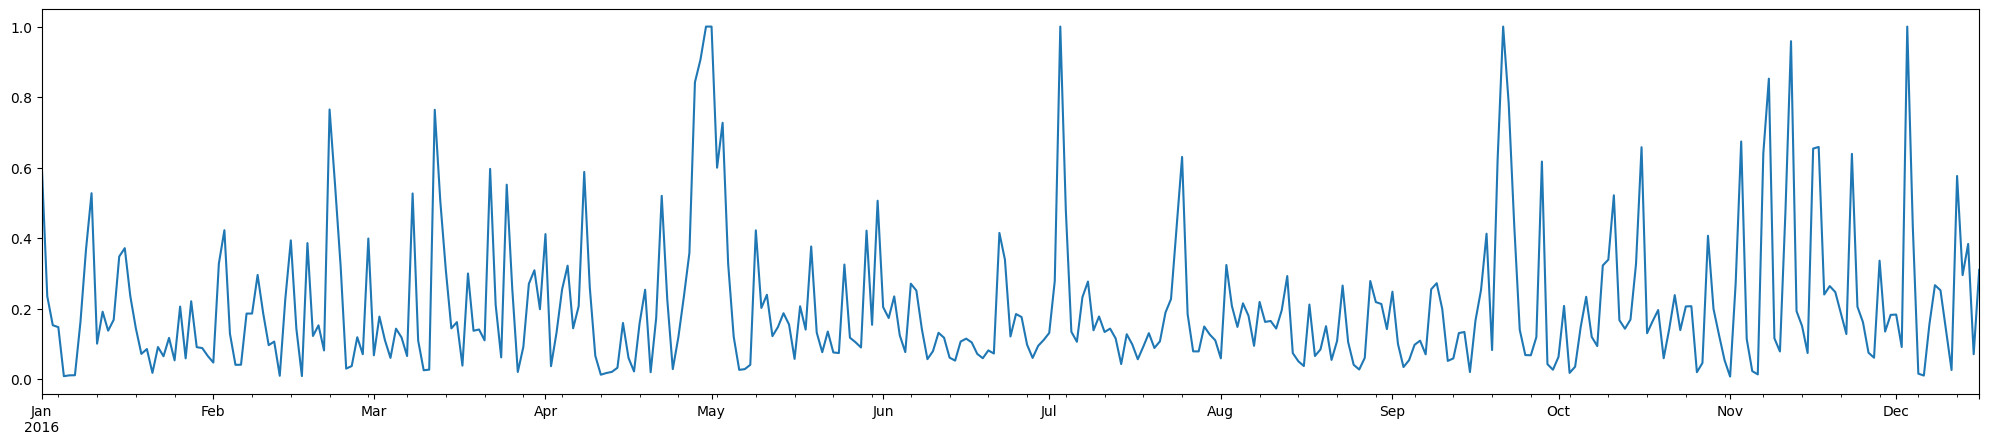

In [ ]:
df['cloudCover'].resample(rule='D').mean().plot(figsize=(25,5))

<ipython-input-34-1050feadbdc8>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  general_energy_per_month = df[general_energy_cols].resample('M').sum() # for energy we use sum to calculate overall consumption in period


<Axes: >

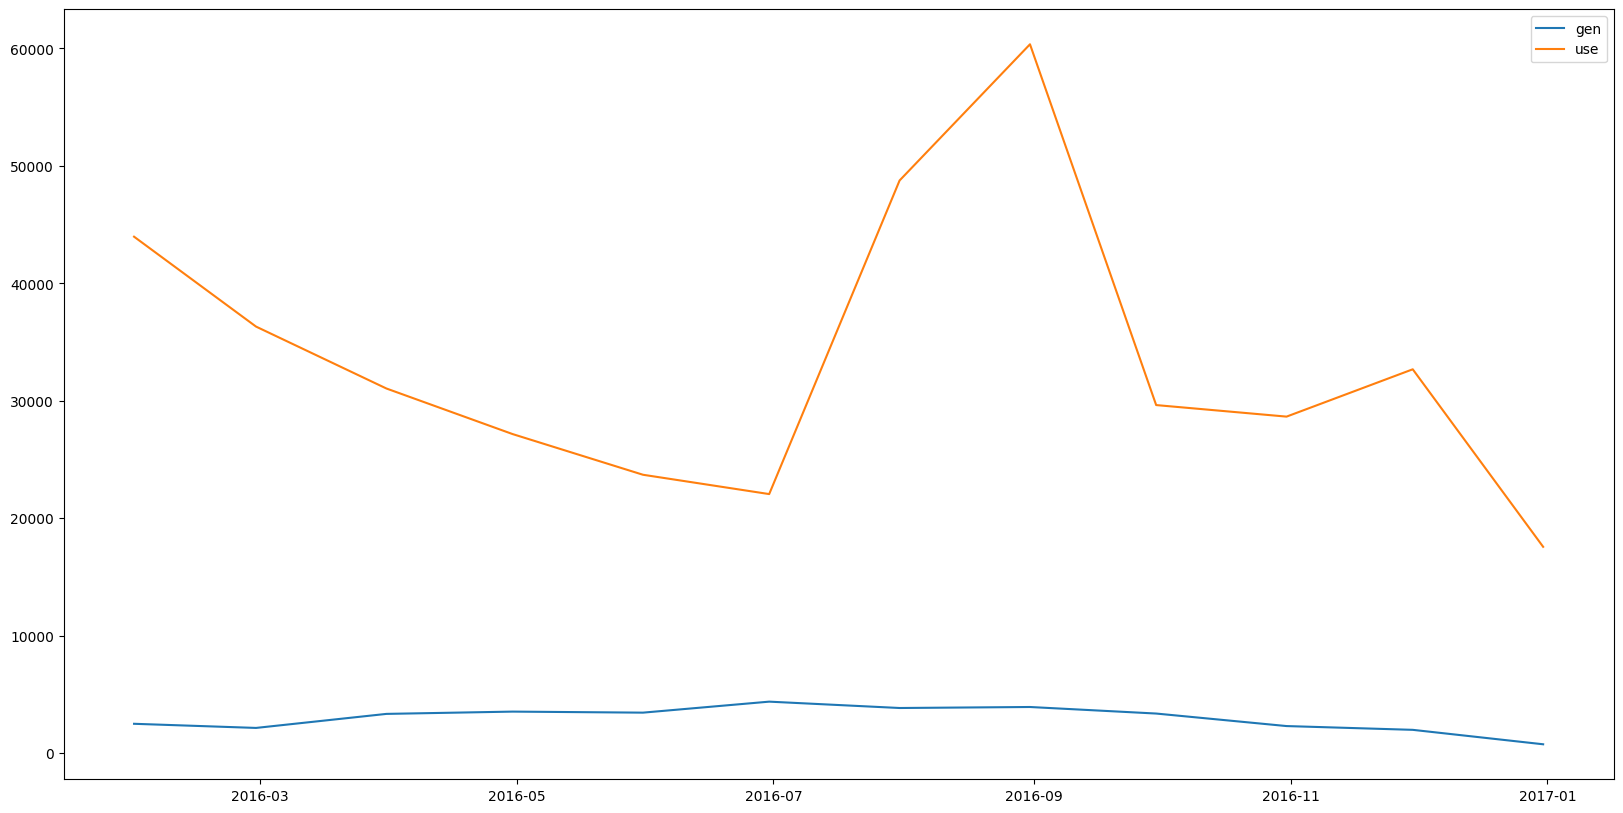

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

general_energy_cols = ['gen', 'use']
general_energy_per_month = df[general_energy_cols].resample('M').sum() # for energy we use sum to calculate overall consumption in period

plt.figure(figsize=(20,10))

sns.lineplot(data=general_energy_per_month, dashes=False)

<ipython-input-40-3ff73c6ec0a3>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rooms_energy_per_month = df[rooms_energy_cols].resample('M').mean()


<Axes: >

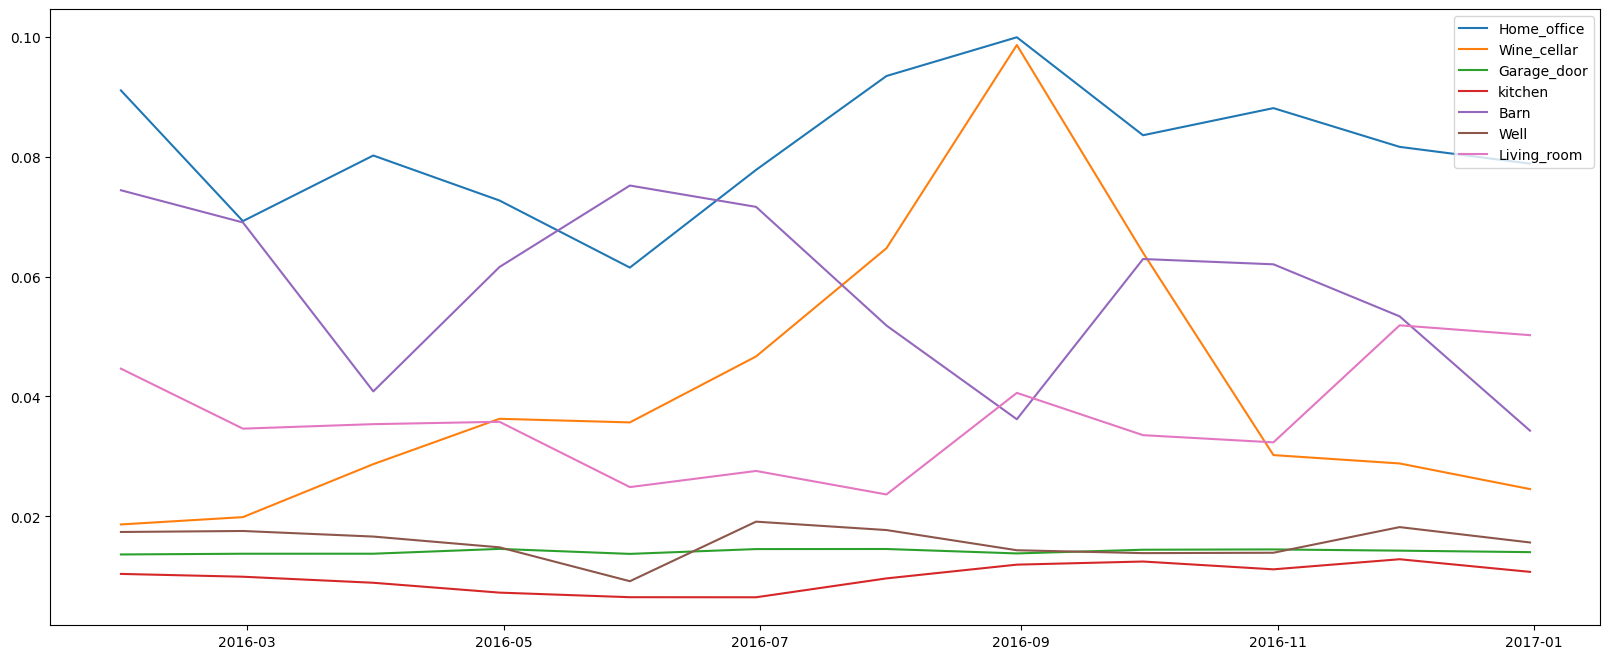

In [ ]:
rooms_energy_cols = ['Home_office', 'Wine_cellar','Garage_door',
                       'kitchen', 'Barn', 'Well','Living_room']

rooms_energy_per_month = df[rooms_energy_cols].resample('M').mean()

plt.figure(figsize=(20,8))

sns.lineplot(data=rooms_energy_per_month, dashes=False)

* The energy consumption of kitchen, garage and the well remained almost the same throughout the year
* There's seasonality of energy consumption in other parts of the house :
    * A clear spike in september in the energy consumed by the wine cellar and the home office
    * A clear downtrend in the summer for the barn energy consumption

<ipython-input-41-546f85a4ef03>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  equipements_energy_per_month = df[equipements_cols].resample('M').mean()


<Axes: >

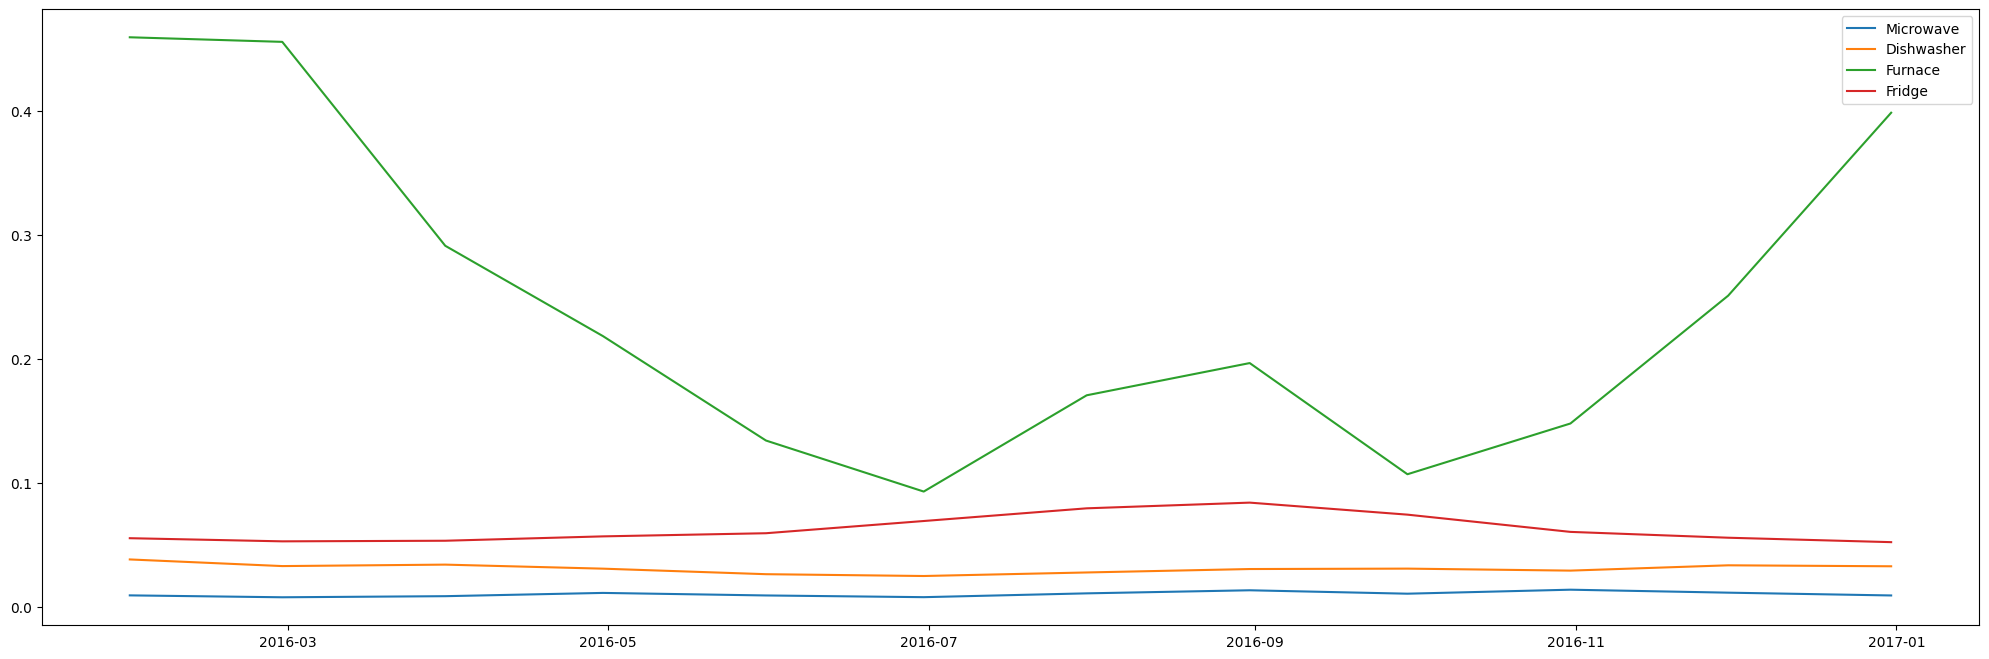

In [ ]:
equipements_cols = ['Microwave', 'Dishwasher', 'Furnace', 'Fridge']

equipements_energy_per_month = df[equipements_cols].resample('M').mean()

plt.figure(figsize=(25,8))

sns.lineplot(data= equipements_energy_per_month, dashes=False)

The usage of the furnace decreases in the summer

<ipython-input-49-43741b8d9db6>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weather_per_month = df[weather_columns].resample('M').mean()


<Axes: >

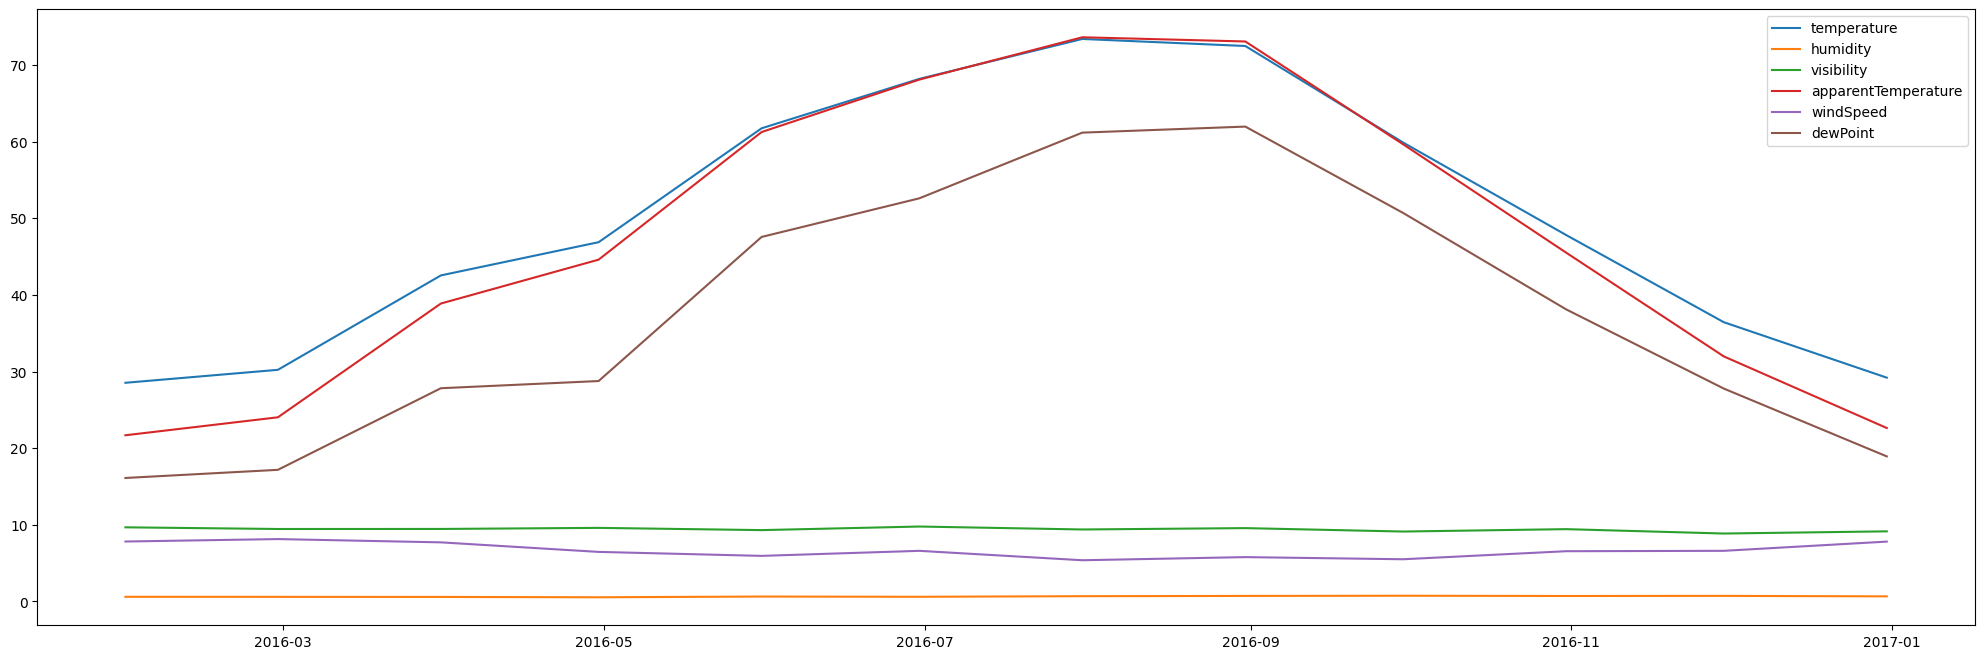

In [ ]:
weather_columns = ['temperature','humidity', 'visibility', 'apparentTemperature',
                   'windSpeed', 'dewPoint']

weather_per_month = df[weather_columns].resample('M').mean()

plt.figure(figsize=(25,8))

sns.lineplot(data=weather_per_month, dashes=False)

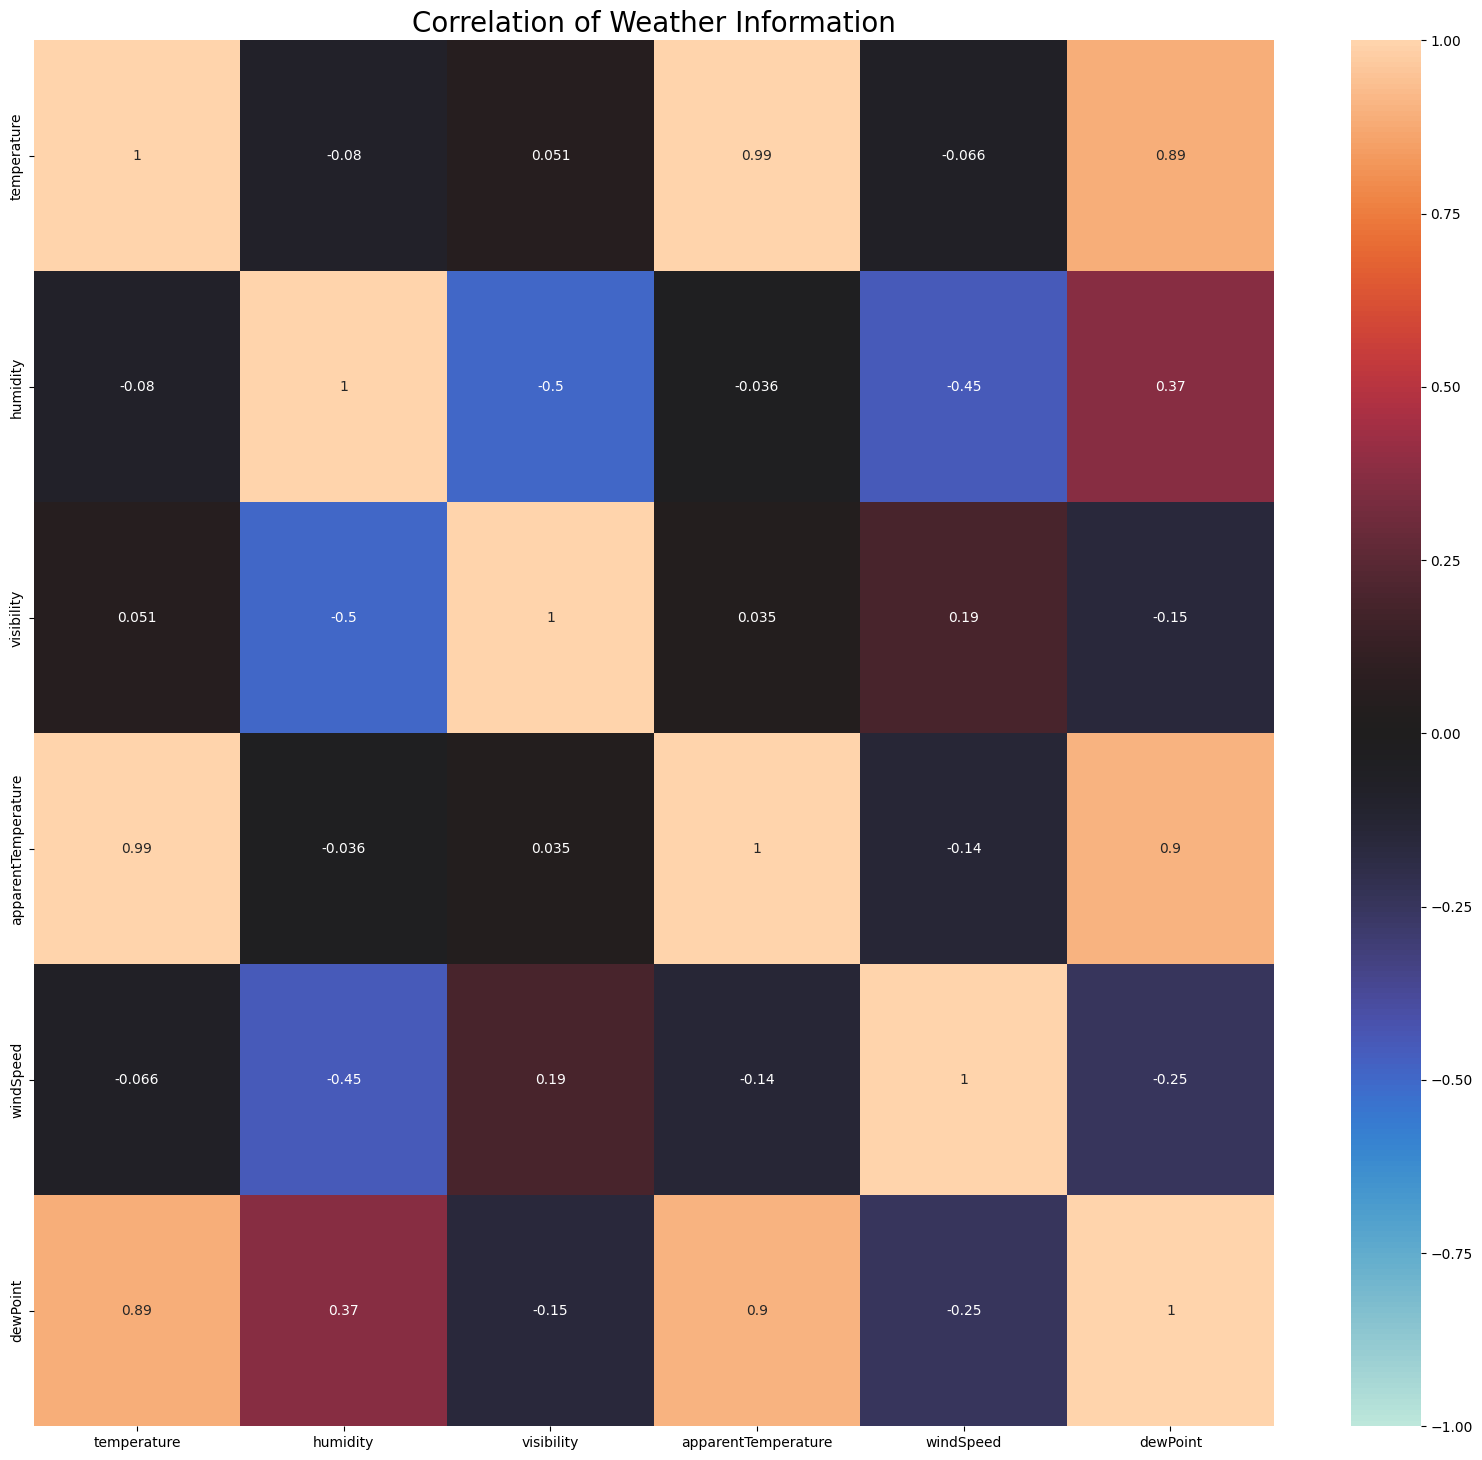

In [ ]:
fig,ax = plt.subplots(figsize=(20, 18))
corr = df[weather_columns].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Weather Information', size=20)
plt.show()

----

# Modeling : What are we trying to solve ?

* Case 1 Change Detection : Detecting excessive energy consumption in advance and preventing increase in usage fees.
* Case 2 Predict Future Consumption : Predicting future energy consumption and generation by utilizing weather information and optimizing energy supply.

    [**Inspired by kohei-mu**](https://www.kaggle.com/koheimuramatsu/change-detection-forecasting-in-smart-home#6.-Modeling)

#### Case 1 : Change detection

The change point is the point at which the trends in time series data change over time.
Outliers indicate a momentary abnormal condition (rapid decrease or increase), while change points mean that the abnormal condition does not return to its original state and continue.

Let's use ChangeFinder algorithm

ChangeFinder is an algorithm used to detect change points.
ChangeFinder uses the log-likelihood based on the SDAR(Sequencially Discounting AR) algorithm to calculate the change score.
SDAR algorithm introduces a discounting parameter into the AR algorithm to reduce the influence of past data, so that even non-stationary time series data can be learned robustly.

ChangeFinder has two steps of model training:
* Training STEP1
Train a time series model at each data point using the SDAR algorithm
Based on the trained time series model, calculate the likelihood that the data points at the next time point will appear
Calculate the logarithmic loss and use it as an outlier score

    𝑆𝑐𝑜𝑟𝑒(𝑥𝑡)=−𝑙𝑜𝑔𝑃𝑡−1(𝑥𝑡|𝑥1,𝑥2,…,𝑥𝑡−1)

Smoothing Step
Smooth the outlier score within the smoothing window( 𝑊 ).
By smoothing, the score due to outliers is attenuated, and it is possible to determine whether the abnormal condition has continued for a long time.

    𝑆𝑐𝑜𝑟𝑒_𝑠𝑚𝑜𝑜𝑡ℎ𝑒𝑑(𝑥𝑡)=1𝑊∑𝑡=𝑡−𝑊+1𝑡𝑆𝑐𝑜𝑟𝑒(𝑥𝑖)

* Training STEP2
Using the score obtained by smoothing, train the model with the SDAR algorithm
Based on the trained time series model, calculate the likelihood that the data points at the next time point will appear
Calculate the logarithmic loss and use it as an change score

In [ ]:
# Let's install & import changefinder python library
!pip install changefinder
import changefinder

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.9 MB/s eta 0:00:00
  Created wheel for changefinder: filename=changefinder-0.3-py3-none-any.whl size=3823 sha256=3e6c97b2e97f8037631ad29066113e3aaae8e4697afc48447f6199632adbc54e
  Stored in directory: /root/.cache/pip/wheels/87/d7/6b/f2360569f8deb8a072bcff6f3a589faacbc49aa96756339624
Successfully built changefinder


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
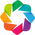

In [ ]:
from scipy import stats
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')


def chng_detection(col, _r=0.01, _order=1, _smooth=10):
    cf = changefinder.ChangeFinder(r=_r, order=_order, smooth=_smooth)
    ch_df = pd.DataFrame()
    ch_df[col] = df[col].resample('D').mean()

    # calculate the change score
    ch_df['change_score'] = [cf.update(i) for i in ch_df[col]]
    ch_score_q1 = stats.scoreatpercentile(ch_df['change_score'], 25)
    ch_score_q3 = stats.scoreatpercentile(ch_df['change_score'], 75)
    thr_upper = ch_score_q3 + (ch_score_q3 - ch_score_q1) * 3

    anom_score = hv.Curve(ch_df['change_score'])
    anom_score_th = hv.HLine(thr_upper).opts(color='red', line_dash="dotdash")

    anom_points = [[ch_df.index[i],ch_df[col][i]] for i, score in enumerate(ch_df["change_score"]) if score > thr_upper]
    org = hv.Curve(ch_df[col],label=col).opts(yformatter='%.1fkw')
    detected = hv.Points(anom_points, label=f"{col} detected").opts(color='red', legend_position='bottom', size=5)

    return ((anom_score * anom_score_th).opts(title=f"{col} Change Score & Threshold") + \
            (org * detected).opts(title=f"{col} Detected Points")).opts(opts.Curve(width=800, height=300, show_grid=True, tools=['hover'])).cols(1)

* Discounting parameter  𝑟(0<𝑟<1)  : The smaller this value, the greater the influence of the past data points and the greater the variation in the change score
* Order parameter for AR  𝑜𝑟𝑑𝑒𝑟  : How far past data points are included in the model
* Smoothing window  𝑠𝑚𝑜𝑜𝑡ℎ  : The greater this parameter is, the easier it is to capture the essential changes rather than the outliers, but if it is too large, it will be difficult to capture the changes themselves

In [ ]:
chng_detection('use', _r=0.001, _order=1, _smooth=3)

<ipython-input-44-0b6835b58fbf>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anom_points = [[ch_df.index[i],ch_df[col][i]] for i, score in enumerate(ch_df["change_score"]) if score > thr_upper]


:Layout
   .Overlay.I  :Overlay
      .Curve.I :Curve   [index]   (change_score)
      .HLine.I :HLine   [x,y]
   .Overlay.II :Overlay
      .Curve.Use           :Curve   [index]   (use)
      .Points.Use_detected :Points   [x,y]

In [ ]:
df.columns

Index(['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office',
       'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14',
       'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'kitchen', 'Furnace'],
      dtype='object')

In [ ]:
chng_detection('Furnace', _r=0.001, _order=1, _smooth=3)

<ipython-input-44-0b6835b58fbf>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anom_points = [[ch_df.index[i],ch_df[col][i]] for i, score in enumerate(ch_df["change_score"]) if score > thr_upper]


:Layout
   .Overlay.I  :Overlay
      .Curve.I :Curve   [index]   (change_score)
      .HLine.I :HLine   [x,y]
   .Overlay.II :Overlay
      .Curve.Furnace           :Curve   [index]   (Furnace)
      .Points.Furnace_detected :Points   [x,y]

---